# Review

## Axes

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('./data/churn.csv')

Text(0.5, 1.0, '2o grafico')

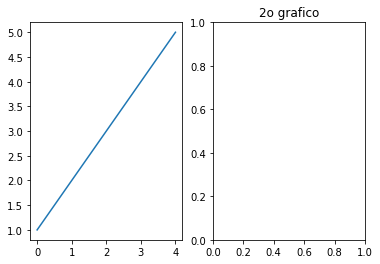

In [11]:
fig, axes = plt.subplots(1, 2)

axes[0].plot([1,2,3,4,5])
axes[1].set_title('2o grafico')

In [64]:
x = np.arange(-3, 3, 0.01)
y = np.sin(x)

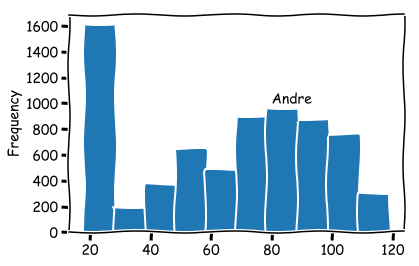

In [70]:
with plt.xkcd(randomness=2):
    df.MonthlyCharges.plot(kind='hist')
    plt.text(80, 1000, 'Andre')

## Pandas Plot

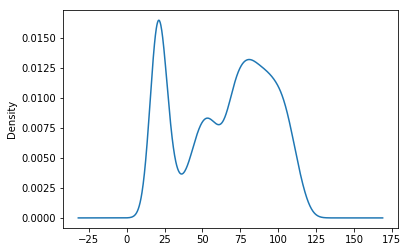

In [17]:
df.MonthlyCharges.plot(kind='hist')

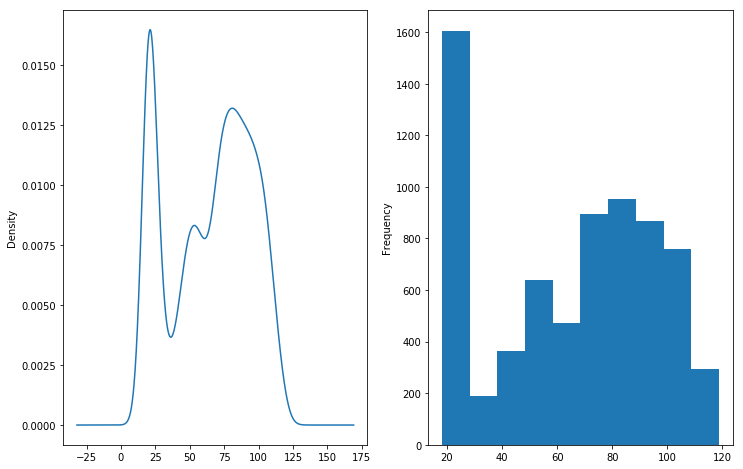

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12,8))

df.MonthlyCharges.plot(kind='hist', ax=axes[1])
df.MonthlyCharges.plot(kind='kde', ax=axes[0])

## Interative Pandas

In [21]:
import cufflinks as cf
cf.go_offline()

In [25]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
df.query('gender == "Female" and PhoneService == "No"').iplot(kind='scatter',mode='markers', x='tenure', y='MonthlyCharges', categories='Contract')

In [22]:
df.MonthlyCharges.iplot(kind='hist')

In [29]:
import re
import numpy as np
import pandas as pd

# IPyWidgets

In [30]:
from ipywidgets import interact

In [31]:
df = pd.read_csv('./data/churn.csv')

In [32]:
df['ChurnBinary'] = df['Churn'].apply(lambda x : 1 if x == 'Yes' else 0)

In [33]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnBinary
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [38]:
def plot_total_charges(x):
    df['TotalCharges'].iplot(kind='hist', bins=x, title='Tenure Distribution')

In [43]:
interact(plot_total_charges, x=(0,100, 10))

interactive(children=(IntSlider(value=50, description='x', step=10), Output()), _dom_classes=('widget-interact…

<function __main__.plot_total_charges(x)>

In [44]:
def plot_graph(bins):
    df['TotalCharges'].iplot(kind='hist', bins=bins, title='Tenure Distribution')

In [45]:
interact(plot_graph, bins=(5,50, 5))

interactive(children=(IntSlider(value=25, description='bins', max=50, min=5, step=5), Output()), _dom_classes=…

<function __main__.plot_graph(bins)>

In [46]:
@interact(bins = (5, 50, 5))
def plot_graph(bins):
    df['TotalCharges'].iplot(kind='hist', bins=bins, title='Tenure Distribution')

interactive(children=(IntSlider(value=25, description='bins', max=50, min=5, step=5), Output()), _dom_classes=…

In [47]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnBinary
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0


In [48]:
@interact(churn = [True, False])
def plot_graph(churn):
    
    data = df.query(f'ChurnBinary == {churn}')
    
    data['TotalCharges'].iplot(kind='hist', bins=50, title='Tenure Distribution')

interactive(children=(Dropdown(description='churn', options=(True, False), value=True), Output()), _dom_classe…

In [51]:
list(df['gender'].unique())

['Female', 'Male']

In [49]:
@interact(Gender=list(df['gender'].unique()), 
          Partner=list(df['Partner'].unique()),
          Internet=list(df['InternetService'].unique()), 
          Payment=list(df['PaymentMethod'].unique())
         )

def scatter(Gender, Partner, Internet, Payment):
    data = df.loc[(df['gender']==Gender) & 
                  (df['Partner']==Partner) & 
                  (df['InternetService']==Internet) & 
                  (df['PaymentMethod']==Payment)]

    data.iplot(kind='scatter', x='tenure', y='MonthlyCharges', 
               categories='Churn', text='customerID', 
               xTitle='Tenure', yTitle='Monthly Charges',
               title='Charges vs. Tenure')

interactive(children=(Dropdown(description='Gender', options=('Female', 'Male'), value='Female'), Dropdown(des…

In [14]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnBinary
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0


In [15]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [53]:
@interact(Payment='')

def chart(Payment):
    
    import re
    
    data = df.loc[df['PaymentMethod'].str.contains(Payment)]
    
    
    
    
    data = data.groupby('InternetService').agg({'MonthlyCharges':'sum'}).reset_index()
    custom_dict = {'New': 0, 'Regular': 1, 'Loyal': 2, 'Very Loyal' : 3}  
    data = data.iloc[data['InternetService'].argsort()].set_index('InternetService')
    
    data.iplot(kind='bar', xTitle='Values')

interactive(children=(Text(value='', description='Payment'), Output()), _dom_classes=('widget-interact',))

# This interactivity is not limited to plots

In [54]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnBinary
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0


In [55]:
df.groupby('Churn').mean()

,SeniorCitizen,tenure,MonthlyCharges,ChurnBinary
Churn,,,,
No,0.128721,37.569965,61.265124,0.0
Yes,0.254682,17.979133,74.441332,1.0


In [60]:
from IPython.display import display

@interact(gender=list(df['gender'].unique()),  
          payment=list(df['PaymentMethod'].unique()))
         
def report(gender, payment):
    condition = (df.gender == gender) & (df.PaymentMethod == payment)
    data = df.loc[condition, :]
    display(data.groupby('Churn').mean())
    

interactive(children=(Dropdown(description='gender', options=('Female', 'Male'), value='Female'), Dropdown(des…

# Pandas Styling

In [62]:
from IPython.display import display

@interact(gender=list(df['gender'].unique()),  
          payment=list(df['PaymentMethod'].unique()))
         
def report(gender, payment):
    condition = (df.gender == gender) & (df.PaymentMethod == payment)
    data = df.loc[condition, :]
    display(data.groupby('Churn').mean().style.background_gradient(cmap='Blues'))


interactive(children=(Dropdown(description='gender', options=('Female', 'Male'), value='Female'), Dropdown(des…